<a href="https://colab.research.google.com/github/antonellagambarte/proyecto-final-CEIA/blob/main/modelos2_NHANES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [444]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE

In [445]:
ruta_archivo_train = '/content/drive/My Drive/NHANES/dataset_train_imputado.csv'
ruta_archivo_test = '/content/drive/My Drive/NHANES/dataset_test_imputado.csv'


df_train = pd.read_csv(ruta_archivo_train)
df_test = pd.read_csv(ruta_archivo_test)


In [446]:
df_train.head()

,edad,genero,colesterol_total,hdl,trigliceridos,proteina_c,fam_cardio,fam_asma,fam_diabetes,hipertension,...,presion_sistolica_final,presion_diastolica_final,raza_origen_1,raza_origen_2,raza_origen_3,raza_origen_4,raza_origen_6,raza_origen_7,diabetes_2.0,diabetes_3.0
0,0.252775,1,0.836302,-0.748731,0.194624,0.547785,0,0,0,0,...,0.554321,0.310497,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,-0.141000,0,0.540921,0.316824,1.469750,1.638509,0,1,0,1,...,-0.832083,0.030867,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.434103,1,-1.185449,0.695195,-0.746200,-0.095810,0,0,0,1,...,1.303890,0.310497,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.928552,1,-0.517855,-0.239514,0.121944,0.168128,0,0,1,0,...,-1.087660,-0.134685,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,-0.366015,1,0.349781,0.447201,-0.747205,-0.982146,0,1,0,1,...,-0.213657,0.427966,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [447]:
df_test.head()

,edad,genero,colesterol_total,hdl,trigliceridos,proteina_c,fam_cardio,fam_asma,fam_diabetes,hipertension,...,presion_sistolica_final,presion_diastolica_final,raza_origen_1,raza_origen_2,raza_origen_3,raza_origen_4,raza_origen_6,raza_origen_7,diabetes_2.0,diabetes_3.0
0,-0.422269,1,-0.357335,-0.493765,0.271557,-0.209254,0,0,0,1,...,0.250529,0.836456,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,-1.266074,0,-0.136862,0.754733,0.058258,-0.128435,0,0,0,0,...,-0.325419,-0.272991,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-1.491089,0,-2.062943,-0.576858,-1.405854,-0.304637,0,1,1,0,...,0.040209,-0.203157,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.096581,0,-1.828242,0.927919,-1.340363,-1.211241,0,1,0,1,...,-0.250708,0.030867,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.140268,0,0.276115,-0.661818,0.807326,-0.689028,0,0,0,1,...,0.387222,0.369723,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [448]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4454 entries, 0 to 4453
Data columns (total 41 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   edad                                   4454 non-null   float64
 1   genero                                 4454 non-null   int64  
 2   colesterol_total                       4454 non-null   float64
 3   hdl                                    4454 non-null   float64
 4   trigliceridos                          4454 non-null   float64
 5   proteina_c                             4454 non-null   float64
 6   fam_cardio                             4454 non-null   int64  
 7   fam_asma                               4454 non-null   int64  
 8   fam_diabetes                           4454 non-null   int64  
 9   hipertension                           4454 non-null   int64  
 10  bmi                                    4454 non-null   float64
 11  fumo

In [449]:
# NIVEL 1: Datos de Primera Consulta (Anamnesis y Examen Físico Básico)
# Lo que el médico obtiene preguntando y pesando/midiendo al paciente.
# nivel_1_basico = [
#     'edad', 'genero', 'bmi', 'horas_suenio', 'anhedonia',
#     'fumador_actual', 'fumo_100_cigarrillos', 'consumo_alcohol_ultimo_año',
#     'consumo_excesivo_alcohol_ultimo_año', 'act_caminar_bici', 'act_moderada',
#     'act_vigorosa', 'realiza_actividad_intensidad_moderada',
#     'actividad_deportiva_moderada_x_semana', 'raza_origen_1', 'raza_origen_2',
#     'raza_origen_3', 'raza_origen_4', 'raza_origen_6', 'raza_origen_7'
# ]
nivel_1_basico = [
    'edad', 'genero', 'bmi', 'horas_suenio', 'anhedonia',
    'fumador_actual', 'consumo_alcohol_ultimo_año',
    'act_vigorosa', 'actividad_deportiva_moderada_x_semana', 'raza_origen_1', 'raza_origen_2',
    'raza_origen_3', 'raza_origen_4', 'raza_origen_6', 'raza_origen_7'
]

# NIVEL 2: Antecedentes y Signos Vitales (Diagnósticos previos y Presión)
# Datos que requieren una historia clínica o un tensiómetro.
nivel_2_antecedentes = [
    'fam_cardio', 'fam_asma', 'fam_diabetes', 'hipertension',
    'diabetes_2.0', 'diabetes_3.0', 'prediabetes_glucosa_alterada',
    'ACV', 'colesterol_alto', 'riñones_debiles_fallando',
    'presion_sistolica_final', 'presion_diastolica_final'
]

# NIVEL 3: Laboratorio Avanzado
# Resultados bioquímicos específicos.
nivel_3_laboratorio = [
    'colesterol_total', 'hdl', 'trigliceridos', 'proteina_c',
    'glicohemoglobina', 'hemoglobina', 'ancho_distribucion_globulos', 'creatinina'
]

# Unificamos todas para el entrenamiento inicial
features_totales = nivel_1_basico + nivel_2_antecedentes + nivel_3_laboratorio

In [450]:
# Para eliminar una sola columna (por ejemplo, 'nombre_columna_a_eliminar')
# Si quieres eliminarla permanentemente del DataFrame actual, usa inplace=True
# df_train.drop(columns=['nombre_columna_a_eliminar'], inplace=True)

# Para eliminar varias columnas (por ejemplo, 'columna_1' y 'columna_2')
# df_train.drop(columns=['columna_1', 'columna_2'], inplace=True)

# También puedes asignar el resultado a un nuevo DataFrame sin usar inplace
# df_train_nuevo = df_train.drop(columns=['nombre_columna_a_eliminar'])

# Vamos a mostrar un ejemplo con tu df_train, eliminando una columna de prueba.
# Primero, veamos las columnas actuales para elegir una que se pueda eliminar temporalmente para el ejemplo.
# print('Columnas antes de eliminar:')
# print(df_train.columns.tolist())

# Crearemos una copia para no modificar el df_train original en este ejemplo
df_train_temp = df_train.copy()
df_test_temp = df_test.copy()

columnas_eliminadas = ['raza_origen_7','act_caminar_bici','act_moderada','raza_origen_1','raza_origen_2',
                            'raza_origen_3','raza_origen_4', 'raza_origen_6','colesterol_alto',
                            'ancho_distribucion_globulos','fam_asma','fam_diabetes']

df_train_temp.drop(columns=columnas_eliminadas, inplace=True)
df_test_temp.drop(columns=columnas_eliminadas, inplace=True)

df_train_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4454 entries, 0 to 4453
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   edad                                   4454 non-null   float64
 1   genero                                 4454 non-null   int64  
 2   colesterol_total                       4454 non-null   float64
 3   hdl                                    4454 non-null   float64
 4   trigliceridos                          4454 non-null   float64
 5   proteina_c                             4454 non-null   float64
 6   fam_cardio                             4454 non-null   int64  
 7   hipertension                           4454 non-null   int64  
 8   bmi                                    4454 non-null   float64
 9   fumo_100_cigarrillos                   4454 non-null   int64  
 10  fumador_actual                         4454 non-null   float64
 11  act_

In [451]:
TARGET = "alto_riesgo"

X_train = df_train_temp.drop(columns=[TARGET])
y_train = df_train_temp[TARGET]

X_test = df_test_temp.drop(columns=[TARGET])
y_test = df_test_temp[TARGET]


In [452]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    roc_auc_score,
    recall_score,
    precision_score,
    f1_score,
    confusion_matrix
)


def evaluar_modelo(modelo, X_test, y_test, threshold=0.5, titulo="Modelo"):

    # Probabilidades
    y_prob = modelo.predict_proba(X_test)[:, 1]

    # Predicción binaria según threshold
    y_pred = (y_prob >= threshold).astype(int)

    # Métricas
    auc = roc_auc_score(y_test, y_prob)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"\n===== {titulo} =====")
    print("ROC AUC:", round(auc, 4))
    print("Recall:", round(recall, 4))
    print("Precision:", round(precision, 4))
    print("F1-score:", round(f1, 4))

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    labels = ["Bajo riesgo", "Alto riesgo"]

    plt.figure(figsize=(6,5))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=labels,
        yticklabels=labels
    )

    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.title(f"Matriz de Confusión - {titulo}")
    plt.show()

    return {
        "roc_auc": auc,
        "recall": recall,
        "precision": precision,
        "f1": f1
    }


In [453]:
from sklearn.metrics import (
    roc_auc_score,
    recall_score,
    precision_score,
    f1_score,
    confusion_matrix # Agregamos confusion_matrix aquí
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def evaluar_overfitting(modelo,
                        X_train, y_train,
                        X_test, y_test,
                        threshold=0.25,
                        nombre="Modelo"):

    # Probabilidades
    prob_train = modelo.predict_proba(X_train)[:, 1]
    prob_test = modelo.predict_proba(X_test)[:, 1]

    # Predicciones binarias
    pred_train = (prob_train >= threshold).astype(int)
    pred_test = (prob_test >= threshold).astype(int)

    # Métricas train
    auc_train = roc_auc_score(y_train, prob_train)
    recall_train = recall_score(y_train, pred_train)
    precision_train = precision_score(y_train, pred_train)
    f1_train = f1_score(y_train, pred_train)

    # Métricas test
    auc_test = roc_auc_score(y_test, prob_test)
    recall_test = recall_score(y_test, pred_test)
    precision_test = precision_score(y_test, pred_test)
    f1_test = f1_score(y_test, pred_test)

    print(f"\n===== {nombre} =====")
    print("---- TRAIN ----")
    print(f"AUC: {auc_train:.4f}")
    print(f"Recall: {recall_train:.4f}")
    print(f"Precision: {precision_train:.4f}")
    print(f"F1: {f1_train:.4f}")

    print("\n---- TEST ----")
    print(f"AUC: {auc_test:.4f}")
    print(f"Recall: {recall_test:.4f}")
    print(f"Precision: {precision_test:.4f}")
    print(f"F1: {f1_test:.4f}")

    print("\n---- GAP (Train-Test) ----")
    print(f"AUC gap: {auc_train - auc_test:.4f}")

    # Matriz de confusión para el conjunto de prueba
    cm = confusion_matrix(y_test, pred_test)
    labels = ["Bajo riesgo", "Alto riesgo"]

    # Normalizar la matriz de confusión para mostrar porcentajes
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(6,5))
    sns.heatmap(
        cm_normalized,
        annot=True,
        fmt=".2%", # Formato de porcentaje con 2 decimales
        cmap="Blues",
        xticklabels=labels,
        yticklabels=labels
    )
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.title(f"Matriz de Confusión Normalizada - {nombre} (TEST)")
    plt.show()


Antes SMOTE:
alto_riesgo
0    4032
1     422
Name: count, dtype: int64

Después SMOTE:
alto_riesgo
0    4032
1    2016
Name: count, dtype: int64

===== Random Forest + SMOTE =====
---- TRAIN ----
AUC: 0.9288
Recall: 0.9276
Precision: 0.6335
F1: 0.7528

---- TEST ----
AUC: 0.8275
Recall: 0.8000
Precision: 0.2327
F1: 0.3605

---- GAP (Train-Test) ----
AUC gap: 0.1013


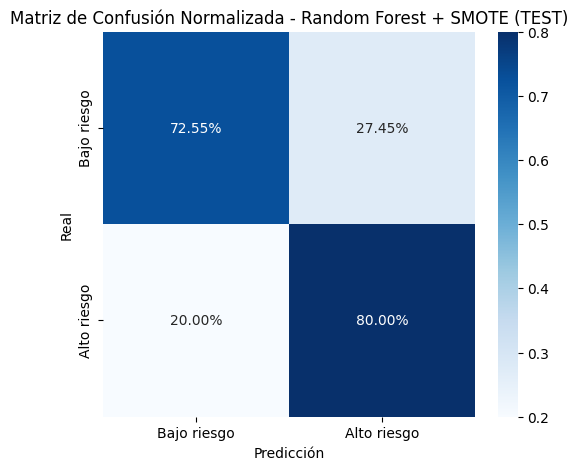

In [454]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

# Oversampling
smote = SMOTE(
   sampling_strategy=0.5,
    random_state=42,
    k_neighbors=3
)

X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print("Antes SMOTE:")
print(y_train.value_counts())

print("\nDespués SMOTE:")
print(y_train_sm.value_counts())


# Modelo
modelo_smote = RandomForestClassifier(
    max_depth=5,
    n_estimators=100,
    random_state=42
)

modelo_smote.fit(X_train_sm, y_train_sm)
# Eliminamos la llamada a evaluar_modelo para unificar la salida
# evaluar_modelo(
#     modelo_smote,
#     X_test,
#     y_test,
#     threshold=0.3,
#     titulo="Random Forest + SMOTE"
# )

evaluar_overfitting(
    modelo_smote,
    X_train_sm, y_train_sm,
    X_test, y_test,
    threshold=0.3,
    nombre="Random Forest + SMOTE"
)


===== XGBoost =====
---- TRAIN ----
AUC: 0.9215
Recall: 0.9658
Precision: 0.5690
F1: 0.7161

---- TEST ----
AUC: 0.8174
Recall: 0.8762
Precision: 0.1970
F1: 0.3217

---- GAP (Train-Test) ----
AUC gap: 0.1041


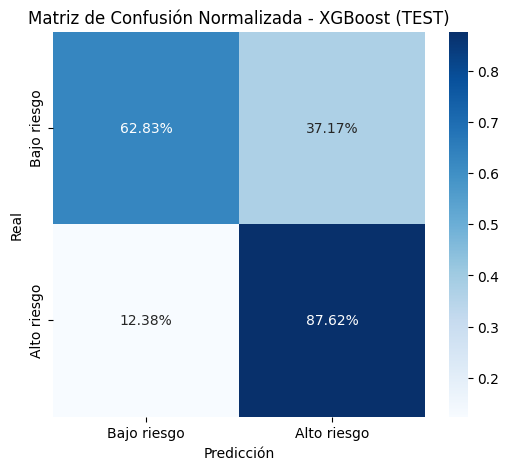

In [455]:
from xgboost import XGBClassifier

# ratio clases para penalización
ratio = (y_train == 0).sum() / (y_train == 1).sum() #9.55

modelo_xgb = XGBClassifier(
    n_estimators=200,
    max_depth=2,
    learning_rate=0.03,
    subsample=0.6,
    colsample_bytree=0.8,
    min_child_weight=2,
    scale_pos_weight=2,
    eval_metric="auc",
    random_state=42
)

modelo_xgb.fit(X_train_sm, y_train_sm)

# Eliminamos la llamada a evaluar_modelo para unificar la salida
# evaluar_modelo(
#     modelo_xgb,
#     X_test,
#     y_test,
#     threshold=0.4,
#     titulo="XGBoost + SMOTE"
# )

evaluar_overfitting(
    modelo_xgb,
    X_train_sm, y_train_sm,
    X_test, y_test,
    threshold=0.3,
    nombre="XGBoost"
)


===== CatBoost =====
---- TRAIN ----
AUC: 0.9728
Recall: 0.9995
Precision: 0.5925
F1: 0.7440

---- TEST ----
AUC: 0.8122
Recall: 0.8667
Precision: 0.1970
F1: 0.3210

---- GAP (Train-Test) ----
AUC gap: 0.1606


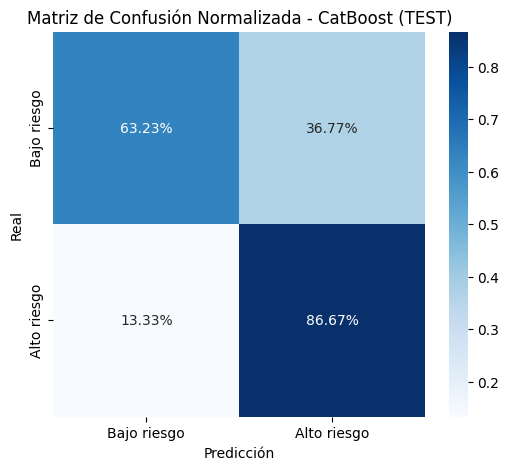

In [456]:
from catboost import CatBoostClassifier

ratio = (y_train == 0).sum() / (y_train == 1).sum()

modelo_cat = CatBoostClassifier(
    iterations=500,
    depth=3,
    learning_rate=0.05,
    loss_function='Logloss',
    scale_pos_weight=ratio,
    verbose=0,
    random_state=42
)

modelo_cat.fit(X_train_sm, y_train_sm)

# Eliminamos la llamada a evaluar_modelo para unificar la salida
# evaluar_modelo(
#     modelo_cat,
#     X_test,
#     y_test,
#     threshold=0.4,
#     titulo="CatBoost + SMOTE"
# )

evaluar_overfitting(
    modelo_cat,
    X_train_sm, y_train_sm,
    X_test, y_test,
    threshold=0.4,
    nombre="CatBoost"
)


===== Balanced RF =====
---- TRAIN ----
AUC: 0.9987
Recall: 1.0000
Precision: 0.3264
F1: 0.4921

---- TEST ----
AUC: 0.8449
Recall: 0.8190
Precision: 0.2544
F1: 0.3883

---- GAP (Train-Test) ----
AUC gap: 0.1538


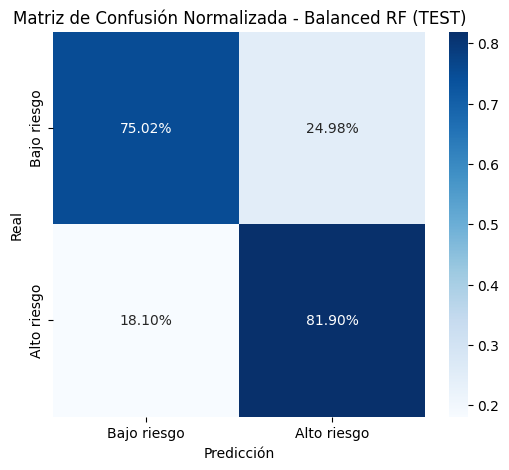

In [457]:
from imblearn.ensemble import BalancedRandomForestClassifier

modelo_brf = BalancedRandomForestClassifier(
    n_estimators=400,
    random_state=42
)

modelo_brf.fit(X_train, y_train)

# Eliminamos la llamada a evaluar_modelo para unificar la salida
# evaluar_modelo(
#     modelo_brf,
#     X_test,
#     y_test,
#     threshold=0.4,
#     titulo="Balanced Random Forest"
# )

evaluar_overfitting(
    modelo_brf,
    X_train, y_train,
    X_test, y_test,
    threshold=0.4,
    nombre="Balanced RF"
)


===== Logistic Regression =====
---- TRAIN ----
AUC: 0.8868
Recall: 0.8886
Precision: 0.2551
F1: 0.3964

---- TEST ----
AUC: 0.8636
Recall: 0.8476
Precision: 0.2465
F1: 0.3820

---- GAP (Train-Test) ----
AUC gap: 0.0231


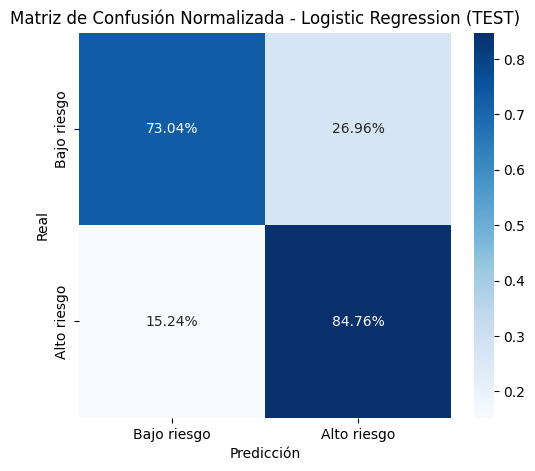

In [458]:
from sklearn.linear_model import LogisticRegression

modelo_lr = LogisticRegression(
    class_weight='balanced',
    max_iter=2000
)

modelo_lr.fit(X_train, y_train)

# Eliminamos la llamada a evaluar_modelo para unificar la salida
# evaluar_modelo(
#     modelo_lr,
#     X_test,
#     y_test,
#     threshold=0.4,
#     titulo="Logistic Regression"
# )

evaluar_overfitting(
    modelo_lr,
    X_train, y_train,
    X_test, y_test,
    threshold=0.4,
    nombre="Logistic Regression"
)

In [459]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    modelo_lr,
    X_train,
    y_train,
    cv=5,
    scoring='roc_auc'
)

print(scores.mean(), scores.std())


0.8748677297627658 0.014912681205977836
